Дурыманов Евгений Валерьевич, отчет по алгоритмам НЛ, И-НЛ.

In [118]:
import bisect
import sys
from test_functions import test_functions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
rec = 100000
sys.setrecursionlimit(rec)

In [137]:
def F(func, dots, x):
    f_s = [func(i) - L * np.abs(x - i) for (i, _, _, _, L) in dots[:-1]]
    f_s.append(func(dots[-1][0]) - dots[-2][4] * np.abs(x - dots[-1][0]))
    return max(f_s)

In [138]:
#dots = [dot, char, gamma, v, h]

def nl(func, dots, counter):

    min_value, min_index = min([(y, i) for i, (_, y, _, _, _) in enumerate(dots)])

    if abs(dots[min_index][0] - dots[min_index + 1][0]) < epsilon_stop:
        func_values = [func(x) for (x, _, _, _, _) in dots]
        return min(func_values), counter

    counter += 1



    new_dot = ((dots[min_index][0] + dots[min_index + 1][0]) / 2) - ((func(dots[min_index + 1][0]) -
                                                                   func(dots[min_index][0])) / (2 * dots[min_index][4]))

    bisect.insort_left(dots, [new_dot, -float("inf"), -float("inf"), 0 , 0])


    x_max = max(dots[index + 1][0] - dots[index][0] for index, _ in enumerate(dots[:-1]))
    lambda_max = max(abs(func(dots[index + 1][0]) - func(dots[index][0])) / (dots[index + 1][0] - dots[index][0]) for index, _ in enumerate(dots[:-1]))

    for index, dot in enumerate(dots[:-1]):
        dot[2] = (lambda_max / x_max) * (dots[index + 1][0] - dots[index][0])

    for index, dot in enumerate(dots[:-1]):
        dot[3] = abs(func(dots[index + 1][0]) - func(dots[index][0])) / (dots[index + 1][0] - dots[index][0])

    for index, dot in enumerate(dots[:-1]):
        if 0 < index < (len(dots) - 2):
            dots[index][4] = tau * max(dots[index][2], epsilon, max(dots[index - 1][3], dots[index][3], dots[index + 1][3]))
        elif index == 0:
            dots[index][4] = tau * max(dots[index][2], epsilon, max(dots[index][3], dots[index + 1][3]))
        else:
            dots[index][4] = tau * max(dots[index][2], epsilon, max(dots[index - 1][3], dots[index][3]))

    for i, dot in enumerate(dots[:-1]):
        char = (func(dots[i + 1][0]) + func(dots[i][0])) / 2 - (dots[i][4] / 2) * (dots[i + 1][0] - dots[i][0])
        dot[1] = char

    return nl(func, dots, counter)

In [139]:
def i_nl(func, dots, counter):
    min_value, min_index = max([(y, -i) for i, (_, y, _, _, _) in enumerate(dots)])
    min_index *= (-1)

    if abs(dots[min_index][0] - dots[min_index + 1][0]) < epsilon_stop:
        func_values = [func(x) for (x, _, _, _, _) in dots]
        return min(func_values), counter

    counter += 1



    new_dot = ((dots[min_index][0] + dots[min_index + 1][0]) / 2) - ((func(dots[min_index + 1][0]) -
                                                                   func(dots[min_index][0])) / (2 * dots[min_index][4]))

    bisect.insort_left(dots, [new_dot, -float("inf"), -float("inf"), 0 , 0])


    x_max = max(dots[index + 1][0] - dots[index][0] for index, _ in enumerate(dots[:-1]))
    lambda_max = max(abs(func(dots[index + 1][0]) - func(dots[index][0])) / (dots[index + 1][0] - dots[index][0]) for index, _ in enumerate(dots[:-1]))

    for index, dot in enumerate(dots[:-1]):
        dot[2] = (lambda_max / x_max) * (dots[index + 1][0] - dots[index][0])

    for index, dot in enumerate(dots[:-1]):
        dot[3] = abs(func(dots[index + 1][0]) - func(dots[index][0])) / (dots[index + 1][0] - dots[index][0])

    for index, dot in enumerate(dots[:-1]):
        if 0 < index < (len(dots) - 2):
            dots[index][4] = tau * max(dots[index][2], epsilon, max(dots[index - 1][3], dots[index][3], dots[index + 1][3]))
        elif index == 0:
            dots[index][4] = tau * max(dots[index][2], epsilon, max(dots[index][3], dots[index + 1][3]))
        else:
            dots[index][4] = tau * max(dots[index][2], epsilon, max(dots[index - 1][3], dots[index][3]))

    for i, dot in enumerate(dots[:-1]):
        char = dot[4] * (dots[i + 1][0] - dots[i][0]) + (((func(dots[i + 1][0]) - func(dots[i][0])) ** 2) /
                 (dot[4] * (dots[i + 1][0] - dots[i][0]))) - (2 * (func(dots[i + 1][0]) + func(dots[i][0])))
        dot[1] = char

    return i_nl(func, dots, counter)

In [140]:
epsilon = 10 ** (-6)
tau = 1.3

In [147]:
xarrays, yarrays, ogarrays = [], [], []

for index, func in enumerate(test_functions):
    x_arr = np.linspace(func.interval[0], func.interval[1], 1200)
    y, og = [], []
    a, b, L, counter = func.interval[0], func.interval[1], func.L, 0
    epsilon_stop = (b - a) * (10 ** -4)
    lam_max, x_max = abs(func.f(b) - func.f(a)) / (b - a), b - a
    H = max(lam_max * (b - a) / x_max, lam_max, epsilon)
    char = (func.f(b) + func.f(a)) / 2 - (tau * H * (b - a) / 2)
    dots = [[a, char, lam_max * (b - a) / x_max, lam_max, H * tau], [b, float("inf"), -float("inf"), -float("inf"), -float("inf")]]
    minval, count = nl(func.f, dots, counter)
    print(index + 1, minval, count)
    for i in x_arr:
        y.append(func.f(i))
        og.append(F(func.f, dots, i))
    xarrays.append(x_arr)
    yarrays.append(y)
    ogarrays.append(og)

1 -29763.233024491772 58
2 -1.8995992840413505 65
3 -12.031248805766644 233
4 -3.850450702657986 61
5 -1.4890724386303253 70
6 -0.8242393329686274 98
7 -1.6013074949151394 64
8 -14.508007488565424 218
9 -1.9059611178127884 67
10 -7.916727371347868 65
11 -1.499999898025297 115
12 -0.999999948070615 105
13 -1.587401051922766 108
14 -0.7886853722886729 75
15 -0.03553390453947445 96
16 7.515924226786005 133
17 7.000000027483907 179
18 1.1856745127849232e-08 61
19 -7.8156745201643325 56
20 -0.06349051843693447 71


1. НЛ - алгоритм, в таблице выше форматом "Номер тестовой функции", "Посчитанный минимум", "Количество итераций работы алгоритма".

2. Снизу отображены графики функции и огибающих ломаных:

- параметр остановки алгоритма: $x_t$ - $x_{t-1}$ < $(b - a) \times $$10^{-4}$, где b, a - граничные точки области определения функции, $x_t$ - точка испытания функции на следующем шаге алгоритма, $x_{t-1}$ - точка испытания ближайшая слева на оси абсцисс
- Параметр безопасности $\tau$ = 1.3

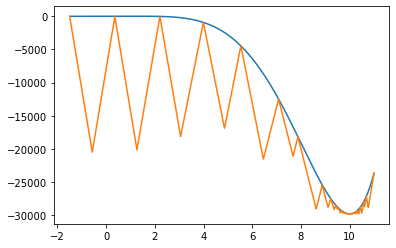

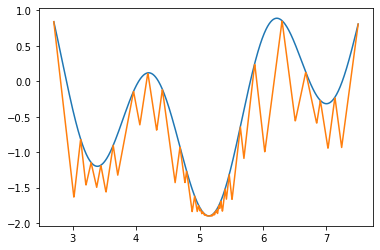

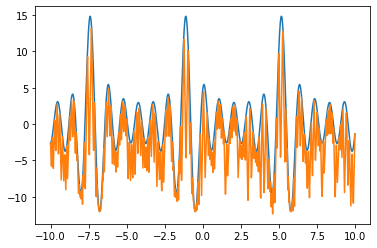

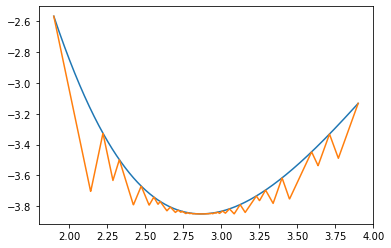

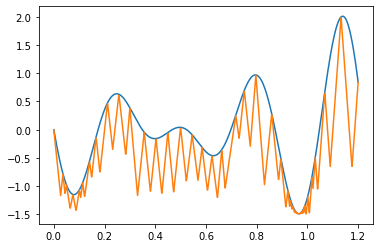

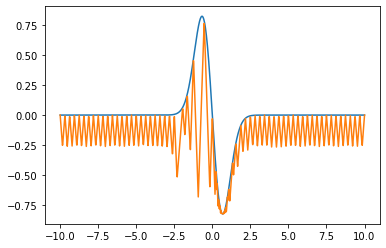

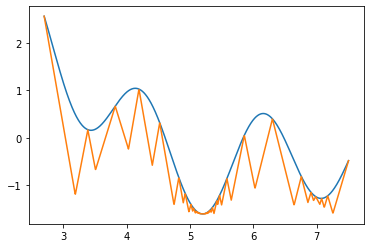

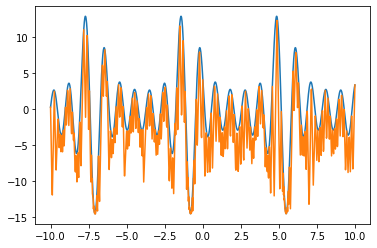

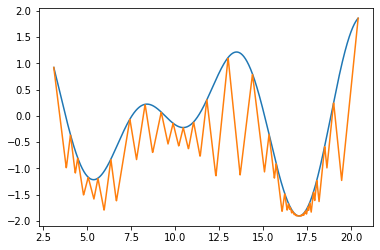

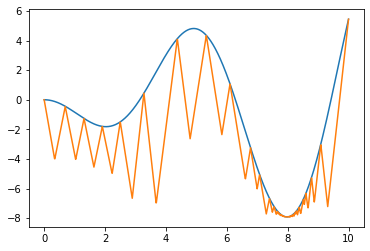

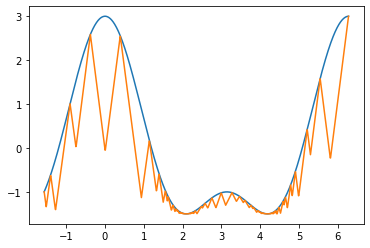

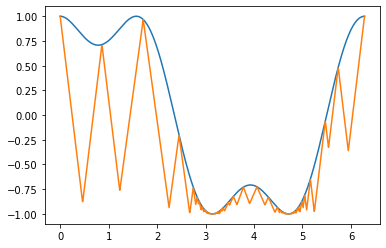

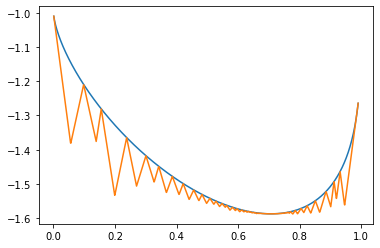

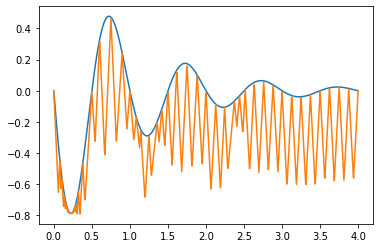

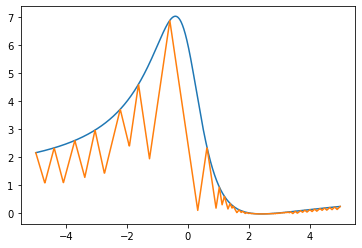

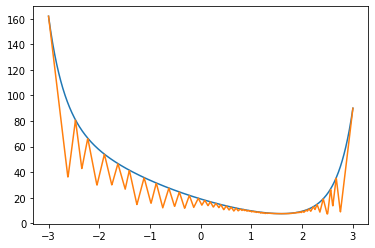

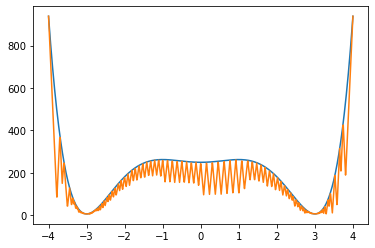

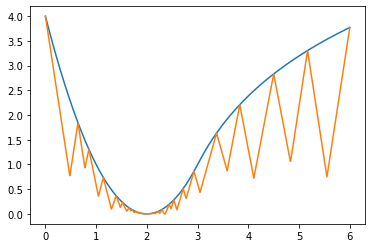

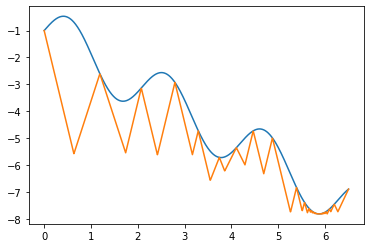

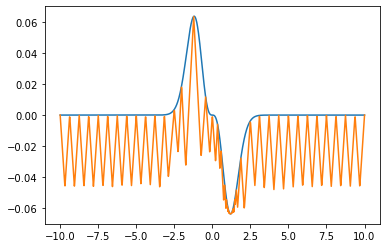

In [148]:
for index in range(20):
    plt.plot(xarrays[index], yarrays[index])
    plt.plot(xarrays[index], ogarrays[index])
    plt.show()

In [149]:
epsilon = 10 ** (-6)
tau = 2

In [150]:
xarrays, yarrays, ogarrays = [], [], []
for index, func in enumerate(test_functions):
    x_arr = np.linspace(func.interval[0], func.interval[1], 1200)
    y, og = [], []
    a, b, L, counter = func.interval[0], func.interval[1], func.L, 0
    epsilon_stop = (b - a) * (10 ** -4)
    lam_max, x_max = abs(func.f(b) - func.f(a)) / (b - a), b - a
    H = max(lam_max * (b - a) / x_max, lam_max, epsilon)
    char = (H * tau * (b - a)) + ((func.f(b) - func.f(a)) ** 2) / (H * tau * (b - a)) - (2 * (func.f(b) + func.f(a)))
    dots = [[a, char, lam_max * (b - a) / x_max, lam_max, H * tau], [b, -float("inf"), -float("inf"), -float("inf"), -float("inf")]]
    minval, count = i_nl(func.f, dots, counter)
    print(index + 1, minval, count)
    for i in x_arr:
        y.append(func.f(i))
        og.append(F(func.f, dots, i))
    xarrays.append(x_arr)
    yarrays.append(y)
    ogarrays.append(og)


1 -29763.233059320064 33
2 -1.8995992784120728 34
3 -12.03123513399257 134
4 -3.850450708555108 39
5 -1.4890724048421196 43
6 -0.8242389917657562 52
7 -1.6013073701074552 37
8 -14.508003284210341 130
9 -1.9059611163666874 40
10 -7.916727202535754 38
11 -1.4999999935249075 70
12 -0.9999999847354238 66
13 -1.5874010515563204 43
14 -0.7886853666298309 43
15 -0.03553390561644027 61
16 7.515924716952817 51
17 7.000000257124356 99
18 6.374230926558649e-09 39
19 -7.815674500734892 32
20 -0.06349049456413208 40


1. И-НЛ - алгоритм, в таблице выше форматом "Номер тестовой функции", "Посчитанный минимум", "Количество итераций работы алгоритма".

- параметр остановки алгоритма: $x_t$ - $x_{t-1}$ < $(b - a) \times $$10^{-4}$, где b, a - граничные точки области определения функции, $x_t$ - точка испытания функции на следующем шаге алгоритма, $x_{t-1}$ - точка испытания ближайшая слева на оси абсцисс
- Параметр безопасности $\tau$ = 2